In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the Dataset
file_path = "Indian automoble buying behavour study 1.0.csv"
df = pd.read_csv(file_path)

# Quick preview
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [3]:
# =====================================
# 3. Data Cleaning and Preparation
# =====================================
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [5]:
df.shape

(99, 13)

In [6]:
# =====================================
# Encoding loans columns:
# =====================================
# Encode loan columns: Yes = 1, No = 0
df["Personal loan"] = df["Personal loan"].map({"Yes": 1, "No": 0})
df["House Loan"] = df["House Loan"].map({"Yes": 1, "No": 0})

In [7]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,1,0,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,1,1,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,1,1,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,0,0,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,1,0,Yes,1800000,800000,2600000,SUV,1600000


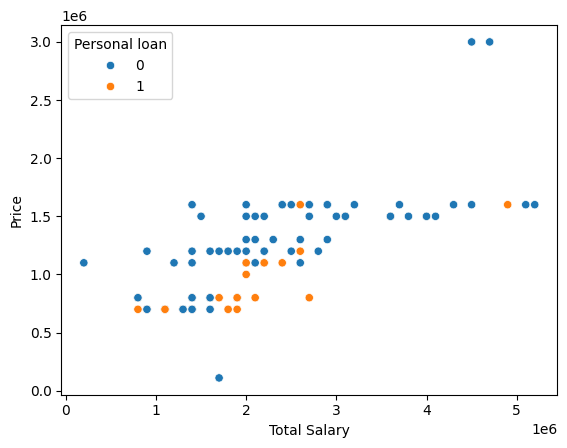

In [13]:
# checking person having personal loan have car or not if have then price range?
sns.scatterplot(x="Total Salary",y="Price",data=df,hue="Personal loan")
plt.show()

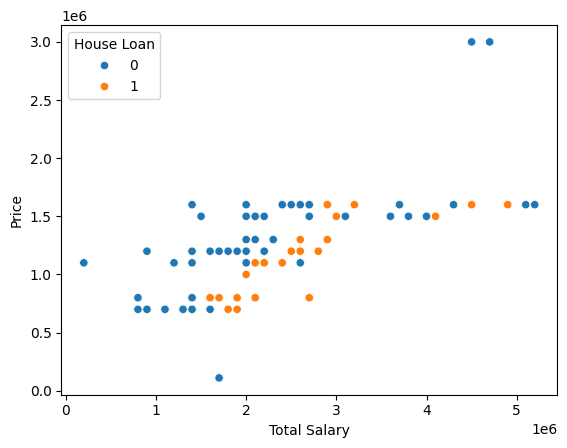

In [12]:
# checking person having House loan have car or not if have then price range?
sns.scatterplot(x="Total Salary",y="Price",data=df,hue="House Loan")
plt.show()

In [14]:
# person having number of loans
# Create new column by adding both loan columns
df["Loan"] = df["Personal loan"] + df["House Loan"]
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Loan
0,27,Salaried,Single,Post Graduate,0,1,0,No,800000,0,800000,i20,800000,1
1,35,Salaried,Married,Post Graduate,2,1,1,Yes,1400000,600000,2000000,Ciaz,1000000,2
2,45,Business,Married,Graduate,4,1,1,No,1800000,0,1800000,Duster,1200000,2
3,41,Business,Married,Post Graduate,3,0,0,Yes,1600000,600000,2200000,City,1200000,0
4,31,Salaried,Married,Post Graduate,2,1,0,Yes,1800000,800000,2600000,SUV,1600000,1


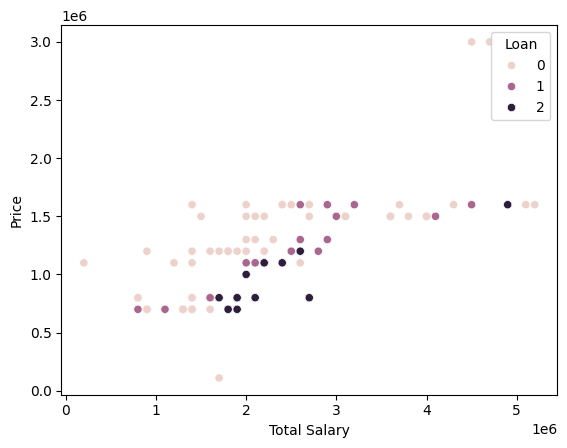

In [15]:
# checking person having any loan have car or not if have then price range?
sns.scatterplot(x="Total Salary",y="Price",data=df, hue="Loan")
plt.show()

In [18]:
# Convert numeric columns
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df['Total Salary'] = pd.to_numeric(df['Total Salary'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create income group 
df['Income Group'] = pd.cut(
    df['Total Salary'],
    bins=[0, 500000, 1000000, 1500000, 2000000, 3000000],
    labels=['<5L', '5L-10L', '10L-15L', '15L-20L', '>20L']
)
df.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Loan,Income Group
0,27,Salaried,Single,Post Graduate,0,1,0,No,800000,0,800000,i20,800000,1,5L-10L
1,35,Salaried,Married,Post Graduate,2,1,1,Yes,1400000,600000,2000000,Ciaz,1000000,2,15L-20L
2,45,Business,Married,Graduate,4,1,1,No,1800000,0,1800000,Duster,1200000,2,15L-20L
3,41,Business,Married,Post Graduate,3,0,0,Yes,1600000,600000,2200000,City,1200000,0,>20L
4,31,Salaried,Married,Post Graduate,2,1,0,Yes,1800000,800000,2600000,SUV,1600000,1,>20L


In [20]:
# =====================================
# 4. Data Scaling for Clustering
# =====================================
X = df[['Total Salary', 'Price']].values

# Standardize data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


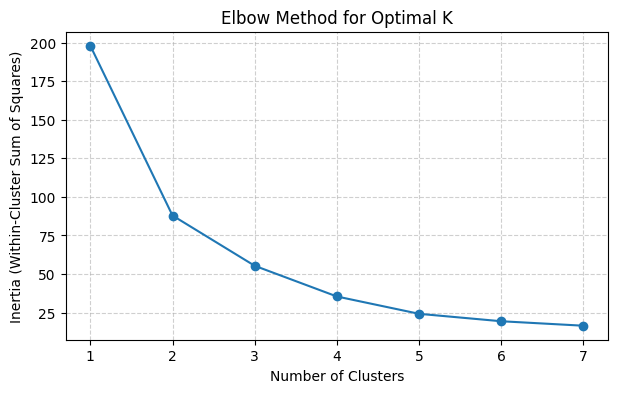

In [21]:
# =====================================
# 5. Determine Optimal Number of Clusters (Elbow Method)
# =====================================
inertia = []
k_values = range(1, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [23]:
# =====================================
# 6. Apply K-Means Clustering (Choose optimal k, e.g., 3)
# =====================================
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster centers (unscaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Add cluster labels
df.head()


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,Loan,Income Group,Cluster
0,27,Salaried,Single,Post Graduate,0,1,0,No,800000,0,800000,i20,800000,1,5L-10L,0
1,35,Salaried,Married,Post Graduate,2,1,1,Yes,1400000,600000,2000000,Ciaz,1000000,2,15L-20L,2
2,45,Business,Married,Graduate,4,1,1,No,1800000,0,1800000,Duster,1200000,2,15L-20L,2
3,41,Business,Married,Post Graduate,3,0,0,Yes,1600000,600000,2200000,City,1200000,0,>20L,2
4,31,Salaried,Married,Post Graduate,2,1,0,Yes,1800000,800000,2600000,SUV,1600000,1,>20L,2


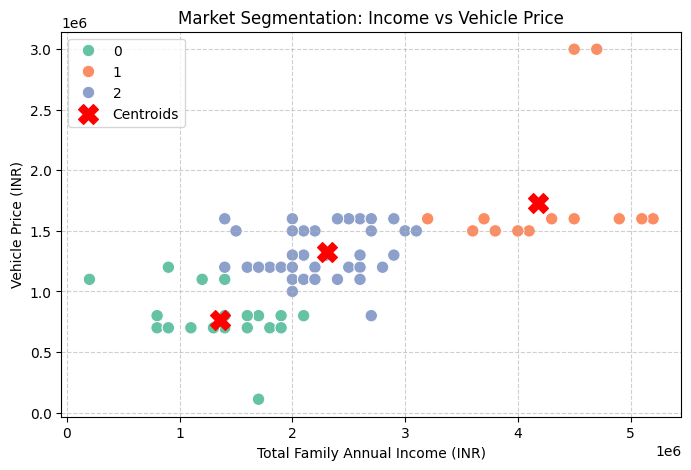

In [24]:
# =====================================
# 7. Visualize Market Segments
# =====================================

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Total Salary', y='Price', hue='Cluster', palette='Set2', s=80)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Market Segmentation: Income vs Vehicle Price")
plt.xlabel("Total Family Annual Income (INR)")
plt.ylabel("Vehicle Price (INR)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [27]:
# =====================================
# 8. Analyze Each Segment
# =====================================
segment_summary = df.groupby('Cluster')[['Total Salary', 'Price']].mean()
segment_summary['Count'] = df['Cluster'].value_counts().sort_index()
segment_summary

,Total Salary,Price,Count
Cluster,,,
0,1.354286e+06,7.660000e+05,35
1,4.175000e+06,1.731250e+06,16
2,2.304167e+06,1.327083e+06,48


In [28]:
#=====================================
# 9. Segment Interpretation
# =====================================

for i, row in segment_summary.iterrows():
    print(f"Segment {i}:")
    print(f" - Average Income: ₹{row['Total Salary']:.0f}")
    print(f" - Average Vehicle Price: ₹{row['Price']:.0f}")
    print(f" - Customers in Segment: {int(row['Count'])}")
    print(" - Possible Insight:", end=" ")

    if row['Total Salary'] < 1000000:
        print("Budget-conscious buyers; prefer small cars or entry-level EVs.")
    elif 1000000 <= row['Total Salary'] < 2000000:
        print("Mid-range buyers; interested in compact SUVs or mid-segment EVs.")
    else:
        print("High-income premium buyers; open to performance or luxury EVs.")
    print()


Segment 0:
 - Average Income: ₹1354286
 - Average Vehicle Price: ₹766000
 - Customers in Segment: 35
 - Possible Insight: Mid-range buyers; interested in compact SUVs or mid-segment EVs.

Segment 1:
 - Average Income: ₹4175000
 - Average Vehicle Price: ₹1731250
 - Customers in Segment: 16
 - Possible Insight: High-income premium buyers; open to performance or luxury EVs.

Segment 2:
 - Average Income: ₹2304167
 - Average Vehicle Price: ₹1327083
 - Customers in Segment: 48
 - Possible Insight: High-income premium buyers; open to performance or luxury EVs.

